In [1]:
import pandas as pd
import numpy as np

In [2]:
customer_demographic = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",skiprows=1)

C:\Users\shour\AppData\Local\Temp\ipykernel_6996\1198912099.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customer_demographic = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",skiprows=1)


In [3]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
for col in customer_demographic.columns:
    print(col)


customer_id
first_name
last_name
gender
past_3_years_bike_related_purchases
DOB
job_title
job_industry_category
wealth_segment
deceased_indicator
default
owns_car
tenure


In [21]:
customer_demographic.shape

(4000, 13)

In [22]:
customer_demographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [23]:
customer_demographic.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [24]:
customer_demographic.customer_id.describe()

count    4000.000000
mean     2000.500000
std      1154.844867
min         1.000000
25%      1000.750000
50%      2000.500000
75%      3000.250000
max      4000.000000
Name: customer_id, dtype: float64

In [31]:
customer_demographic.last_name = customer_demographic.last_name.fillna("")

In [34]:
customer_demographic["customer name"] = customer_demographic.first_name +" " + customer_demographic.last_name

In [36]:
customer_demographic['customer name']

0           Laraine Medendorp
1                 Eli Bockman
2                Arlin Dearle
3                     Talbot 
4       Sheila-kathryn Calton
                ...          
3995         Rosalia Halgarth
3996            Blanch Nisuis
3997           Sarene Woolley
3998               Patrizius 
3999            Kippy Oldland
Name: customer name, Length: 4000, dtype: object

In [37]:
customer_demographic.isna().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
customer name                            0
dtype: int64

In [39]:
customer_demographic.duplicated().sum()

0

In [48]:
customer_demographic.gender.value_counts()

Female          2039
Male            1873
UnIdentified      88
Name: gender, dtype: int64

In [47]:
customer_demographic.gender = customer_demographic.gender.replace(to_replace=['F','Femal'],value='Female')
customer_demographic.gender = customer_demographic.gender.replace(to_replace=['M'],value="Male")
customer_demographic.gender = customer_demographic.gender.replace(to_replace='U',value='UnIdentified')

In [49]:
customer_demographic.DOB.isna().sum()

87

In [51]:
customer_demographic[2023 - customer_demographic.DOB.dt.year > 100 ]  

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,customer name
33,34,Jephthah,Bachmann,UnIdentified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,Jephthah Bachmann


In [59]:
customer_demographic.loc[33,'DOB'] = pd.to_datetime('1943-12-21')

In [60]:
customer_demographic.drop('default', axis=1,inplace=True)

In [61]:
customer_demographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3726
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
customer name                          3998
dtype: int64

In [62]:
customer_demographic.isna().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
customer name                            0
dtype: int64

In [63]:
customer_demographic['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [64]:
customer_demographic['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [65]:
customer_demographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [ ]:
customer_demographic.to_csv('customer_demographic.csv')

In [14]:
customer_demographic.last_name.isna().sum()

125

In [20]:
customer_demographic.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [21]:
customer_demographic.past_3_years_bike_related_purchases.describe()

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [22]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Box Plot for past 3 years bike related purchases')

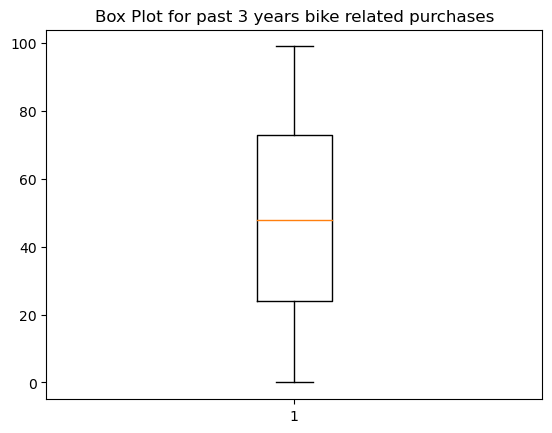

In [23]:
fig, ax = plt.subplots()
ax.boxplot(customer_demographic.past_3_years_bike_related_purchases)
ax.set_title('Box Plot for past 3 years bike related purchases')


In [43]:
customer_demographic[customer_demographic.DOB.dt.year == 1843]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


In [55]:
customer_demographic[customer_demographic.wealth_segment.isna()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


In [56]:
customer_demographic.wealth_segment.value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [60]:
customer_demographic[customer_demographic.deceased_indicator == "Y"]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
752,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Y,-0.5,Yes,6.0
3789,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Y,ÌÌºÍÌ¹Ì¯ÍTÌ±Ì¤ÍÌ¥ÍÍhÍÌ²eÍÍÌ¼ÌÌÌ¼Ì£Í ÍÌÌ±Ì ÍÍÍN...,Yes,9.0


In [62]:
customer_demographic.default.value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

In [66]:
customer_demographic.owns_car.value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [107]:
customer_demographic[ customer_demographic.job_industry_category.isna() == True ].value_counts()

5.0     40
9.0     39
7.0     39
8.0     38
11.0    37
15.0    37
10.0    37
14.0    36
4.0     35
6.0     34
13.0    33
18.0    32
16.0    31
17.0    31
1.0     30
12.0    29
2.0     26
3.0     25
19.0    21
20.0    14
21.0     7
22.0     5
Name: tenure, dtype: int64

In [102]:
customer_demographic.owns_car.value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [84]:
(2023 - customer_demographic.DOB.dt.year).describe()

count    3913.000000
mean       45.969333
std        12.796387
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max       180.000000
Name: DOB, dtype: float64

In [82]:
customer_demographic.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [5]:
customer_demographic.past_3_years_bike_related_purchases.describe()

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [6]:
customer_demographic.columns 

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [10]:
pd.DataFrame(customer_demographic.wealth_segment.value_counts())

,wealth_segment
Mass Customer,2000
High Net Worth,1021
Affluent Customer,979


In [12]:
customer_demographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64